In [ ]:
'''
Introdução à Econometria - Uma abordagem moderna (Tradução da 6 edição norte-americana)
Autor: WOOLDRIDGE, J. M.
Editora: CENGAGE LEARNING

Cap. 6: Análise de regressão múltipla: problemas adicionais (Multiple Regression Analysis: Further Issues)
Exemplo 6.2: Efeitos da poluição sobre os preços dos imóveis
             (EFFECTS OF POLLUTION ON HOUSING PRICES)
             
Arquivo com os dados: hprice2.xls

Arquivo com dados em:
http://students.cengage.com.br/dashboard/private/livroView.jsf;jsessionid=95E9AD889A4A4B7ABBD2A5251F1E14BE?id=104577

Em caso de dúvidas ou problemas, solicitamos, por gentileza, entrar em contato pelo e-mail:
python.economia@gmail.com
'''

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

In [2]:
df = pd.read_excel('hprice2.xls',
                   header=None,
                   usecols=[3, 4, 7, 9, 10],
                   names=['rooms', 'dist', 'stratio', 'lprice', 'lnox'])

In [3]:
df.head()

,rooms,dist,stratio,lprice,lnox
0,6.57,4.09,15.3,10.085810,1.682688
1,6.42,4.97,17.8,9.980402,1.545433
2,7.18,4.97,17.8,10.454500,1.545433
3,7.00,6.06,18.7,10.416310,1.521699
4,7.15,6.06,18.7,10.496790,1.521699


# Comandos sugeridos

### Regressão pelo Método de Mínimos Quadrados Ordinários (MQO ou OLS na sigla em inglês)

In [4]:
modelo = smf.ols(formula='lprice ~ lnox + np.log(dist) + rooms + np.square(rooms) + stratio', data=df)
reg = modelo.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     151.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           7.90e-98
Time:                        19:11:33   Log-Likelihood:                -31.807
No. Observations:                 506   AIC:                             75.61
Df Residuals:                     500   BIC:                             101.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.3855      0.566     23.629      0.000      12.273      14.498
lnox                -0.9017      0.115     -7.862      0.000      -1.127      -0.676
np.log(dist)        -0.0868      0.043     -2.005      0.045      -0.172      -0.002
rooms               -0.5451      0.165     -3.295      0.001      -0.870      -0.220
np.square(rooms)     0.0623      0.013      4.862      0.000       0.037       0.087
stratio             -0.0476      0.006     -8.129      0.000      -0.059      -0.036
==============================================================================
Omnibus:                       56.649   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.169
Skew:                          -0.100   Prob(JB):                     3.79e-84
Kurtosis:                       7.264   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
'''
Observação
A estatística-t do termo quadrático "rooms**2" consta no livro como 4,77. Na tabela acima vemos o valor de 4,862. 
A diferença decorre de arredondamento.
'''

### Valores ótimos

In [5]:
# Estabelece variáveis como se fossem "variáveis matemáticas"
lnox, dist, rooms, stratio = sp.symbols('lnox, dist, rooms, stratio', real=True)    

In [6]:
# Estabelece a função lprice
lprice = reg.params['Intercept'] + reg.params['lnox'] * lnox + reg.params['np.log(dist)'] * sp.log(dist) +\
         reg.params['rooms'] * rooms + reg.params['np.square(rooms)'] * rooms**2 + reg.params['stratio']*stratio
lprice

-0.901682908105255*lnox + 0.0622611472806876*rooms**2 - 0.545112324481812*rooms - 0.0475902477592443*stratio - 0.0867819843703669*log(dist) + 13.3854789550098

In [7]:
# derivada de lprice em relação à rooms
dlprice_drooms = lprice.diff(rooms)
dlprice_drooms

0.124522294561375*rooms - 0.545112324481812

In [8]:
# Soluciona "dlprice_drooms = 0" (Condição de 1ª ordem) para encontrar o ponto crítico
sp.solvers.solve(dlprice_drooms, symbols=rooms, dict=True)

[{rooms: 4.37762833074952}]

In [ ]:
# Para rooms = 4.38, lprice atinge seu valor mínimo

In [9]:
rooms_min = 4.37762833074952

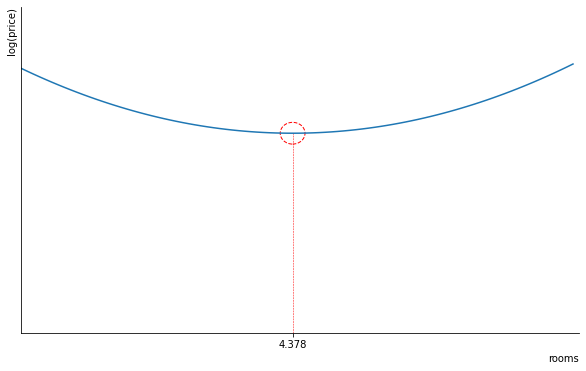

In [10]:
# Apenas para reprodução do gráfico (Figura 6.2), fixaremos as variáveis lnox, stratio, dist em seus valores médios
lnox_mean = df['lnox'].mean()
stratio_mean = df['stratio'].mean()
dist_mean = df['dist'].mean()

lprice_min = lprice.subs({rooms: rooms_min, lnox: lnox_mean, stratio: stratio_mean, dist: dist_mean})

# A linha abaixo gera a sequencia: 0, 0.1 ,0.2, 0.3, ..., 8.9
x = np.arange(0, 9, 0.1)        
# y: valores para "lprice" quando "rooms" assume os valores da lista "x" acima, fixados lnox, stratio e dist em suas médias
y = [lprice.subs({rooms: i, lnox: lnox_mean, stratio: stratio_mean, dist: dist_mean}) for i in x] 

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylim(6, 12)
plt.xlim(0, 9)
plt.xticks(ticks=[rooms_min])
plt.yticks(ticks=[])
plt.xlabel('rooms', loc='right')
plt.ylabel('log(price)', loc='top')
plt.vlines(x=rooms_min, ymin=0, ymax=float(lprice_min), linestyles='--', color='red',linewidth=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.add_patch(ptc.Circle((rooms_min, float(lprice_min)), radius=0.2, edgecolor='red', linestyle='--', fill=False))
plt.show()

In [11]:
# Número de comunidades na amostra que possuem imóveis com média de 4,4 cômodos ou menos
filtro = df['rooms'] < 4.4
filtro.sum()

5

In [12]:
# Porcentagem de comunidades na amostra que possuem imóveis com média de 4,4 cômodos ou menos
100 * (filtro.sum() / df['rooms'].count())

0.9881422924901186

### Efeitos marginais (retorno de um cômodo adicional)

In [13]:
dlprice_drooms

0.124522294561375*rooms - 0.545112324481812

In [14]:
# Um aumento em "rooms" de 5 para 6 aumenta o preço em aproximadamente 7,75% (no livro consta 7,5%)
100 * dlprice_drooms.subs({rooms: 5})

7.74991483250641

In [15]:
# Um aumento em "rooms" de 6 para 7 aumenta o preço em aproximadamente 20,2% (no livro consta 19,9%)
100 * dlprice_drooms.subs({rooms: 6})

20.2021442886439

In [16]:
# Um aumento em "rooms" de 7 para 8 aumenta o preço em aproximadamente 32,65% (no livro consta 32,3%)
100 * dlprice_drooms.subs({rooms: 7})

32.6543737447815

In [17]:
# Efeito de um cômodo a mais no preço quando rooms = 6.45
100 * dlprice_drooms.subs({rooms: 6.45})

25.8056475439058

### Regressão eliminando-se o termo quadrático (rooms**2)

In [18]:
modelo_1 = smf.ols(formula='lprice ~ lnox + np.log(dist) + rooms + stratio', data=df)
reg_1 = modelo_1.fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           5.53e-94
Time:                        19:13:03   Log-Likelihood:                -43.495
No. Observations:                 506   AIC:                             96.99
Df Residuals:                     501   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       11.0839      0.318     34.843      0.000      10.459      11.709
lnox            -0.9535      0.117     -8.168      0.000      -1.183      -0.724
np.log(dist)    -0.1343      0.043     -3.117      0.002      -0.219      -0.050
rooms            0.2545      0.019     13.736      0.000       0.218       0.291
stratio         -0.0525      0.006     -8.894      0.000      -0.064      -0.041
==============================================================================
Omnibus:                       61.317   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.141
Skew:                           0.051   Prob(JB):                    5.48e-105
Kurtosis:                       7.771   Cond. No.                         560.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Nota sobre List Comprehension

In [19]:
lista = []
for i in [1, 2, 3, 4]:
    lista.append(i**2)

lista

[1, 4, 9, 16]

In [20]:
# Este comando gera a mesma lista da célula acima (list comprehension)
[i**2 for i in [1, 2, 3, 4]]

[1, 4, 9, 16]

### Notas sobre alguns comandos do sympy

In [21]:
# cria as variáveis "x" e "z" como se fossem variáveis matemáticas (assumindo valores no conjunto dos números reais)
x, z = sp.symbols('x, z', real=True)

In [22]:
# cria "y" como uma "função de x"
y = x**3 - 3*x + z
y

x**3 - 3*x + z

In [23]:
# encontra o valor de y para x = -2 e z = 3
y.subs({x: -2, z: 3})

1

In [24]:
# Alternativa para cálculo da função num ponto em que podemos escolher "uma acurácia de n dígitos"
y.evalf(n=4, subs={x: 0, z: 5/3})

1.667

In [25]:
# Encontra a derivada parcial de y em relação à x
dy_dx = y.diff(x)
dy_dx

3*x**2 - 3

In [26]:
# Encontra o valor de x para que "dy_dx = 0" ; sendo dy_dx = 3x**2 - 3
sp.solvers.solve(dy_dx, symbols=x, dict=True)

[{x: -1}, {x: 1}]